In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

(x_tr, y_tr), (x_ts, y_ts) = mnist.load_data()

In [2]:
x_tr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
num_labels = len(np.unique(y_tr))

y_tr = to_categorical(y_tr)
y_ts = to_categorical(y_ts)

image_size = x_tr.shape[1]

In [4]:
x_tr = np.reshape(x_tr, [-1, image_size, image_size])
x_ts = np.reshape(x_ts, [-1, image_size, image_size])
x_tr = x_tr.astype('float32') / 255
x_ts = x_ts.astype('float32') / 255

input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2


In [5]:
model = Sequential()
model.add(SimpleRNN(units = units, dropout=dropout, input_shape = input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


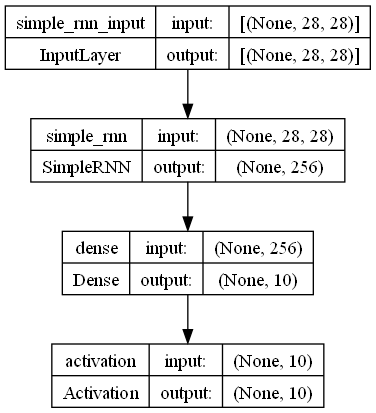

In [6]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [7]:
model.fit(x_tr, y_tr, epochs=2, batch_size = batch_size)

Epoch 1/2
469/469 [==============================] - 20s 41ms/step - loss: 0.7580 - accuracy: 0.7831
Epoch 2/2
469/469 [==============================] - 16s 35ms/step - loss: 0.3166 - accuracy: 0.9070


In [8]:
loss, acc = model.evaluate(x_ts, y_ts, batch_size = batch_size)
print('\nTest accuracy: %.1f%%' %(100.0*acc))

79/79 [==============================] - 1s 8ms/step - loss: 0.2200 - accuracy: 0.9356

Test accuracy: 93.6%
